In [57]:
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt

In [58]:
ticker = 'AAPL'
start = '2015-01-01'
end = '2023-12-31'

raw_data = yf.download(ticker, start, end)

df = raw_data.stack(future_stack=True).reset_index()[['Date', 'Adj Close']]

df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close
0,2015-01-02 00:00:00+00:00,24.347179
1,2015-01-05 00:00:00+00:00,23.661270
2,2015-01-06 00:00:00+00:00,23.663504
3,2015-01-07 00:00:00+00:00,23.995314
4,2015-01-08 00:00:00+00:00,24.917271


### Daily returns

In [59]:
df['Net Return'] = df['Adj Close'] / df['Adj Close'].shift(1) - 1

df['Gross Return'] = df['Adj Close'] / df['Adj Close'].shift(1)

df['Log Return'] = np.log(df['Gross Return'])

df

Price,Date,Adj Close,Net Return,Gross Return,Log Return
0,2015-01-02 00:00:00+00:00,24.347179,NaN,NaN,NaN
1,2015-01-05 00:00:00+00:00,23.661270,-0.028172,0.971828,-0.028576
2,2015-01-06 00:00:00+00:00,23.663504,0.000094,1.000094,0.000094
3,2015-01-07 00:00:00+00:00,23.995314,0.014022,1.014022,0.013925
4,2015-01-08 00:00:00+00:00,24.917271,0.038422,1.038422,0.037703
...,...,...,...,...,...
2259,2023-12-22 00:00:00+00:00,192.656189,-0.005547,0.994453,-0.005563
2260,2023-12-26 00:00:00+00:00,192.108871,-0.002841,0.997159,-0.002845
2261,2023-12-27 00:00:00+00:00,192.208359,0.000518,1.000518,0.000518
2262,2023-12-28 00:00:00+00:00,192.636261,0.002226,1.002226,0.002224


### Compounding returns

In [60]:
df['Cummulative Compounded Return'] = df['Gross Return'].cumprod() - 1

df['Cummulative Compounded Return (Log)'] = df['Log Return'].cumsum()

df

Price,Date,Adj Close,Net Return,Gross Return,Log Return,Cummulative Compounded Return,Cummulative Compounded Return (Log)
0,2015-01-02 00:00:00+00:00,24.347179,NaN,NaN,NaN,NaN,NaN
1,2015-01-05 00:00:00+00:00,23.661270,-0.028172,0.971828,-0.028576,-0.028172,-0.028576
2,2015-01-06 00:00:00+00:00,23.663504,0.000094,1.000094,0.000094,-0.028080,-0.028482
3,2015-01-07 00:00:00+00:00,23.995314,0.014022,1.014022,0.013925,-0.014452,-0.014557
4,2015-01-08 00:00:00+00:00,24.917271,0.038422,1.038422,0.037703,0.023415,0.023145
...,...,...,...,...,...,...,...
2259,2023-12-22 00:00:00+00:00,192.656189,-0.005547,0.994453,-0.005563,6.912875,2.068491
2260,2023-12-26 00:00:00+00:00,192.108871,-0.002841,0.997159,-0.002845,6.890395,2.065646
2261,2023-12-27 00:00:00+00:00,192.208359,0.000518,1.000518,0.000518,6.894482,2.066164
2262,2023-12-28 00:00:00+00:00,192.636261,0.002226,1.002226,0.002224,6.912057,2.068388


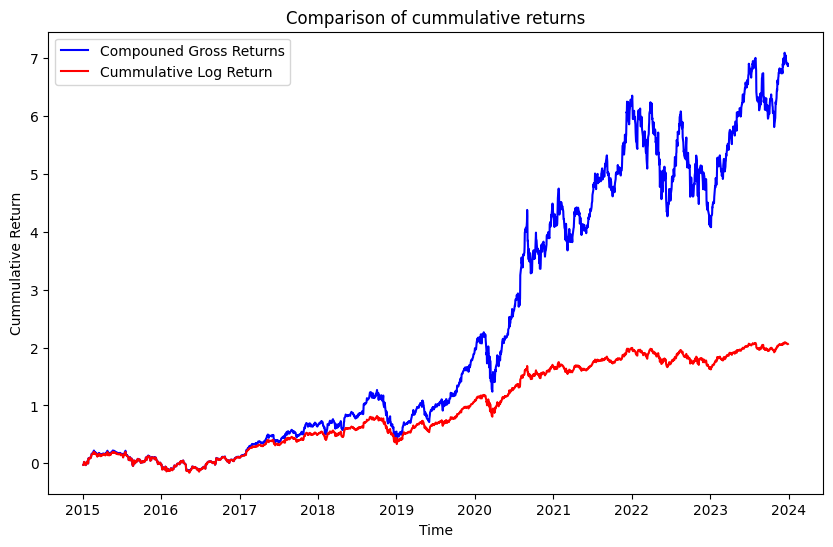

In [61]:
plt.figure(figsize=(10,6))
plt.title("Comparison of cummulative returns")
plt.plot(df['Date'], df['Cummulative Compounded Return'], label='Compouned Gross Returns', color='blue')
plt.plot(df['Date'], df['Cummulative Compounded Return (Log)'], label='Cummulative Log Return', color='red')
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.legend()
plt.show()

# What's going on here? The blue line is what you would have earned if you invested at the very beginning of the chart.
# However, you can't drop yourself in anywhere else on the blue line because the compounding would reset. 
# The red line is what you would earn if you dropped yourself in at any location along the line,
# but it is always in terms of log returns.
# When creating plots over long sample periods, it is common to show things in log returns.

In [62]:
# Note that we can always get the true compounded return from the log return by exponentiating it

total_compounded_return = df['Cummulative Compounded Return'].iloc[-1]
total_log_return = df['Cummulative Compounded Return (Log)'].iloc[-1]

exp_log_return = np.exp(total_log_return) - 1

total_compounded_return, exp_log_return

(np.float64(6.869140882357858), np.float64(6.86914088235788))